<a href="https://colab.research.google.com/github/RakeshSharma21/Sessions_Notebook/blob/main/Linear_Regression_Class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 3.58MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [2]:
import pandas as pd

df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
## df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
## describe the data for both numberic variables and object variable
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


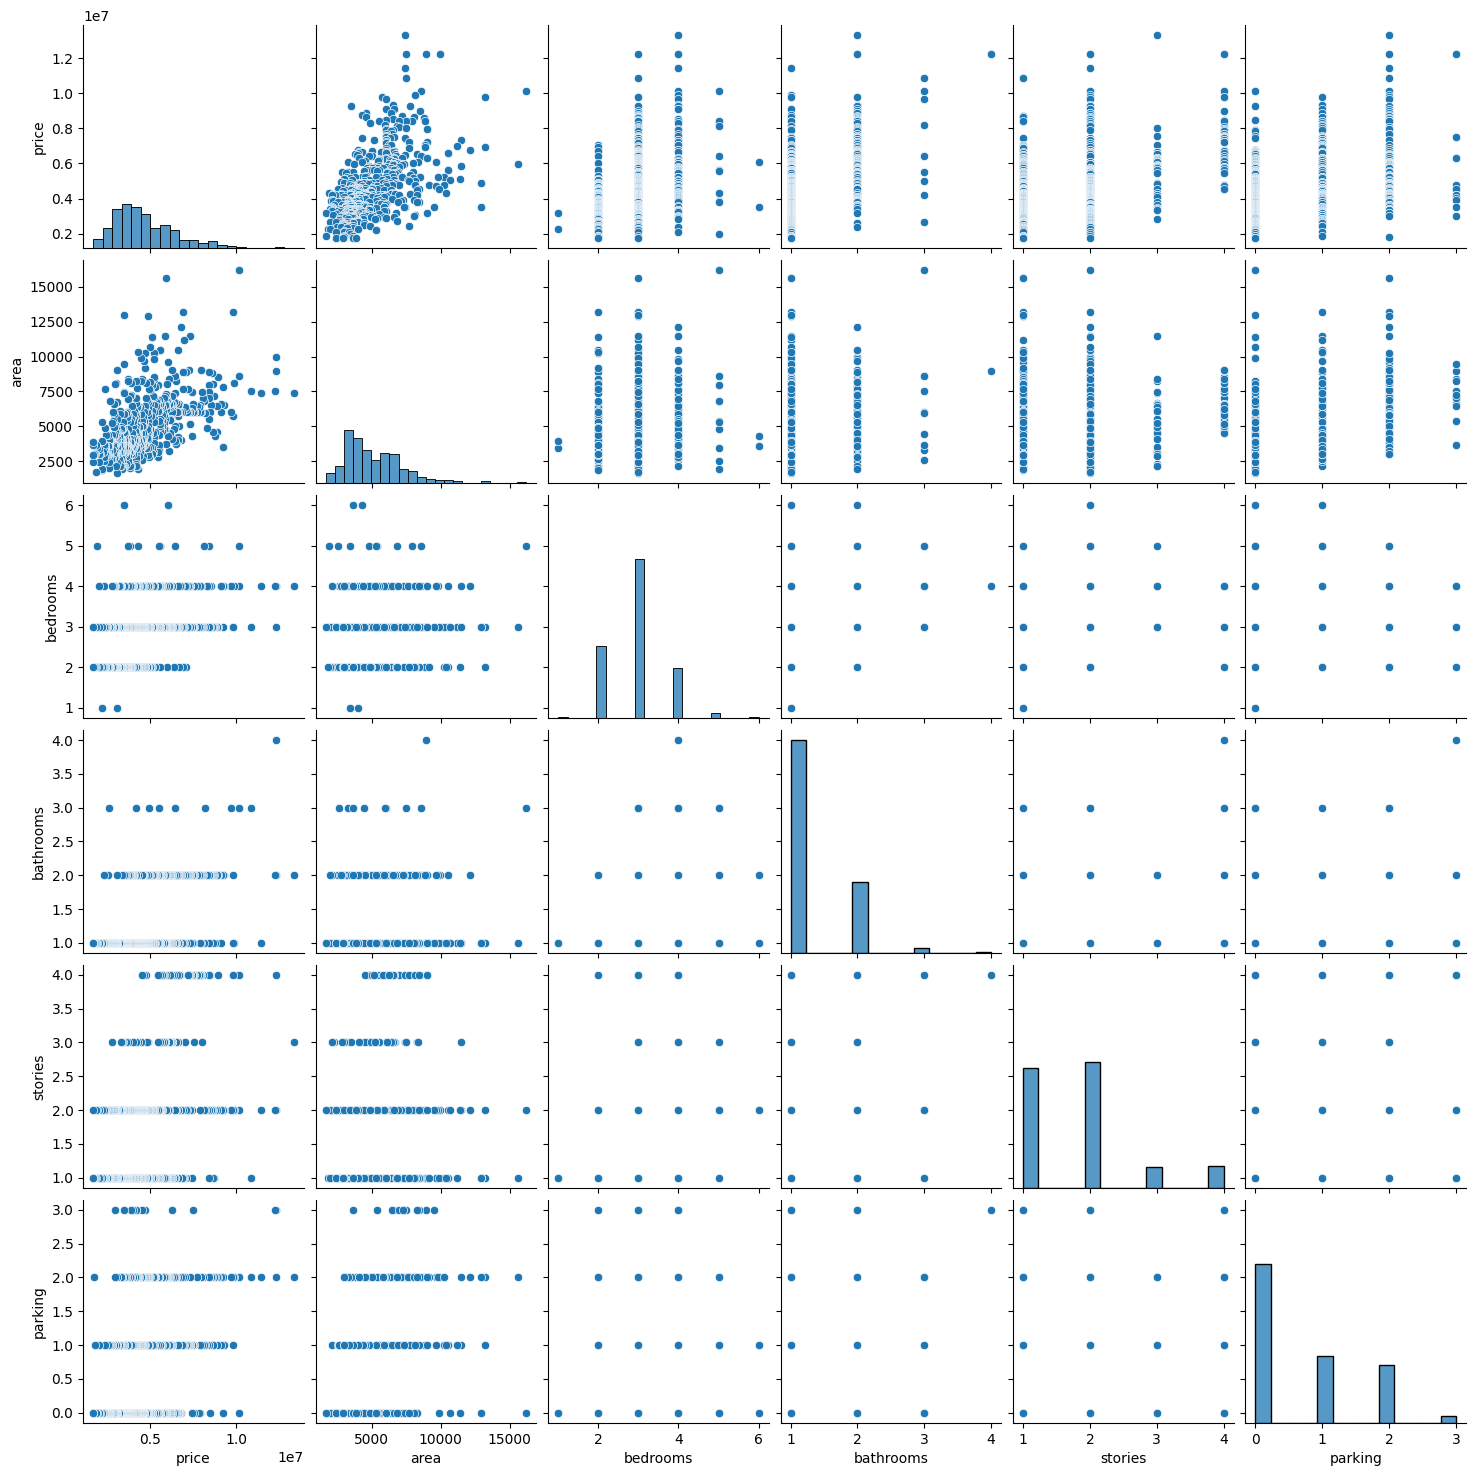

In [6]:
## pairplot on the df
import seaborn as sns
sns.pairplot(df)

<Axes: >

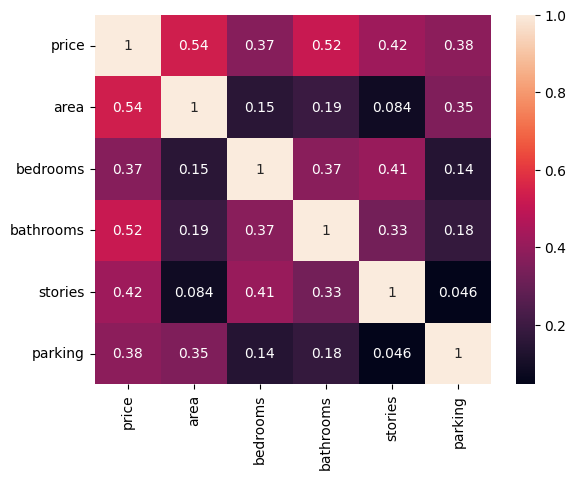

In [9]:
## plot the correlation in the df donot consider the object type variables
df1= df.select_dtypes(exclude=['object'])
sns.heatmap(df1.corr(), annot=True)


In [10]:
## look at the duplication in the df
df.duplicated().sum()

0

In [18]:
## define independent variable (features) and dependent variable (target)
X = df.drop(columns=['price'])
y = df['price']

In [19]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
## Convert categorical variables to numerical in the dataframe
X1 = pd.get_dummies(X,drop_first=True,dtype="int")
X1.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [21]:
### Normalise the features X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [22]:
X_scaled

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615]])

In [23]:
## split the data in training and testing dataset (80% train and 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
### Apply Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
print("coefficients:",model.coef_)
print("intercept:",model.intercept_)

coefficients: [ 511615.56377666   56615.57245779  549420.50124098  353158.42985604
  193542.78167455  128151.92129533   88590.21346152  186194.15050566
  143233.20624958  367817.89491558  267018.66081239  -62550.29721128
 -193987.7810882 ]
intercept: 4737518.175380117


In [28]:
## Make predictions:
y_pred = model.predict(X_test)
print("Predicted values:",y_pred[:5])
print("actual values:",y_test[:5].values)

Predicted values: [5164653.90033967 7224722.29802166 3109863.24240338 4612075.3272256
 3294646.25725956]
actual values: [4060000 6650000 3710000 6440000 2800000]


In [29]:
## Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1754318687330.6675
R-squared: 0.6529242642153177


In [32]:
mse/len(y_test)

16094666856.244656

In [30]:
## average mean squared error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 970043.403920164


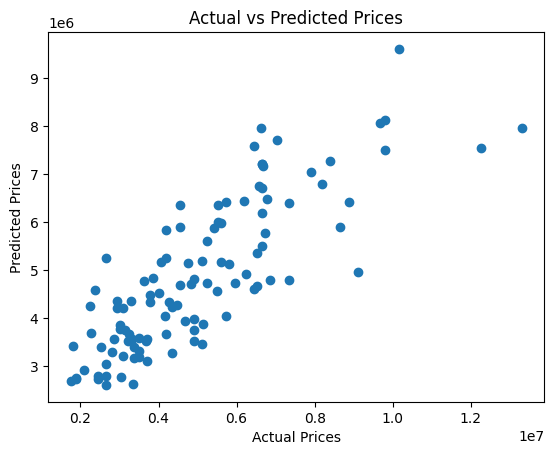

In [33]:
# Plot predicted vs actual prices
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [36]:
## Plot the importance of each feature (absolute value of coeffficeints)
feature_importance = pd.Series(model.coef_, index=X1.columns).abs()
feature_importance.sort_values(ascending=False, inplace=True)


In [37]:
feature_importance

,0
bathrooms,549420.501241
area,511615.563777
airconditioning_yes,367817.894916
stories,353158.429856
prefarea_yes,267018.660812
furnishingstatus_unfurnished,193987.781088
parking,193542.781675
basement_yes,186194.150506
hotwaterheating_yes,143233.206250
mainroad_yes,128151.921295
